### Heart Disease Prediction Using Logistics Regression

### Business/Real World Problem

- *Introduction **
- World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases.
- Half the deaths in the United States and other developed countries are due to cardio vascular diseases. 
- The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. 
- This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.

### Data Introduction

In [9]:
# male0 = Female; 1 = Male
# ageAge at exam time.
# education1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college
# currentSmoker0 = nonsmoker; 1 = smoker
# cigsPerDaynumber of cigarettes smoked per day (estimated average)
# BPMeds0 = Not on Blood Pressure medications; 1 = Is on Blood Pressure medications
# prevalentStroked
# prevalentHyp
# diabetes0 = No; 1 = Yes
# totCholmg/dL
# sysBPmmHg
# diaBPmmHg
# BMIBody Mass Index calculated as: Weight (kg) / Height(meter-squared)
# heartRateBeats/Min (Ventricular)
# glucosemg/dL
# TenYearCHD

### Import Library

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read Data

In [11]:
df=pd.read_csv("framingham.csv")

In [12]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


#### Missing Values

In [14]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [15]:
### Replace nan values with average of columns

In [16]:
# df.fillna(df.mean())

In [17]:
df1= df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [18]:
df1.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Selecting Dependent and Independent Variable

In [19]:
X=df1.iloc[:,:-1]

In [20]:
len(X)

4240

In [21]:
y=df1.iloc[:,-1]

In [22]:
len(y)

4240

### Splitting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=00.25, random_state=0)

Here, the Dataset is broken into two parts in a ratio of 75:25. It means 75% data will be used for model training and 25% for model testing.

### Model Development and Prediction

First, import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function.
Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model=LogisticRegression()

In [27]:
# fit the model with data
model.fit(X_train,y_train)

/home/ml/anaconda3/envs/py36/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
y_pred=model.predict(X_test)

In [29]:
len(y_pred)

1060

### Model Evaluation using Confusion Matrix

A confusion matrix is a table that is used to evaluate the performance of a classification model. 

In [30]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[898,   3],
       [148,  11]])

Text(0.5, 257.44, 'Predicted label')

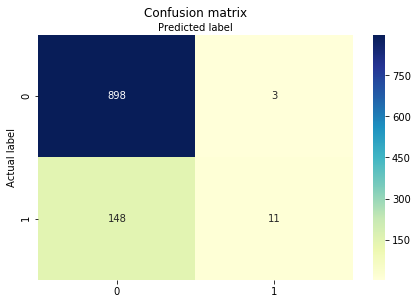

In [31]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Confusion Matrix Evaluation Metrics

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8575471698113207
Precision: 0.7857142857142857
Recall: 0.06918238993710692


Well, you got a classification rate of 85%, considered as good accuracy.

Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted patients are going to suffer from diabetes, that patients have 78% of the time.

Recall: If there are patients who have diabetes in the test set and your Logistic Regression model can identify it 69% of the time.

## ROC Curve

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

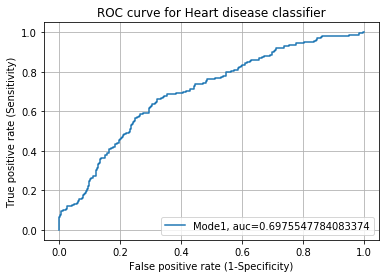

In [40]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Mode1, auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)
plt.show()

AUC score for the case is 0.69. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

### Advantages

Because of its efficient and straightforward nature, doesn't require high computation power, easy to implement, easily interpretable, used widely by data analyst and scientist. Also, it doesn't require scaling of features. Logistic regression provides a probability score for observations

### Disadvantages

Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.

### Conclusion

In this tutorial, you covered a lot of details about Logistic Regression. You have learned what the logistic regression is, how to build respective models, how to visualize results and some of the theoretical background information. Also, you covered some basic concepts such as the sigmoid function, maximum likelihood, confusion matrix, ROC curve.

Hopefully, you can now utilize the Logistic Regression technique to analyze your own datasets. Thanks for reading this tutorial!

- **All attributes selected after the elimination process show Pvalues lower than 5% and thereby suggesting significant role in the Heart disease prediction.** 

- **Men seem to be more susceptible to heart disease than women.Increase in Age,number of cigarettes smoked per day and systolic Blood Pressure also show increasing odds of having heart disease.** 

- **Total cholesterol shows no significant change in the odds of CHD. This could be due to the presence of 'good cholesterol(HDL) in the total cholesterol reading.Glucose too causes a very negligible change in odds (0.2%)** 

- **The model predicted with 0.85 accuracy. The model is more specific than sensitive.** 

- **The Area under the ROC curve is 69 which is somewhat satisfactory. ** 

- ** Overall model could be improved with more data.**